<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/Stock-Price-Prediction/blob/main/stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
data = yf.Ticker('HINDALCO.NS')

In [ ]:
data = data.history(period='max')

In [ ]:
data.shape

(6809, 7)

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,59.551304,65.479984,59.028750,59.286800,15273,0.0,0.0
1996-01-02 00:00:00+05:30,59.286778,59.448061,59.222267,59.415806,17623,0.0,0.0
1996-01-03 00:00:00+05:30,59.415830,59.222291,59.157780,59.157780,5286,0.0,0.0
1996-01-04 00:00:00+05:30,59.028750,59.028750,58.515877,58.515877,12336,0.0,0.0
1996-01-05 00:00:00+05:30,58.448132,58.512649,58.273953,58.357819,12923,0.0,0.0


In [ ]:
data = data[~data['Open'].isnull()]

In [ ]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
data.isna()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,False,False,False,False,False,False,False
1996-01-02 00:00:00+05:30,False,False,False,False,False,False,False
1996-01-03 00:00:00+05:30,False,False,False,False,False,False,False
1996-01-04 00:00:00+05:30,False,False,False,False,False,False,False
1996-01-05 00:00:00+05:30,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2023-01-17 00:00:00+05:30,False,False,False,False,False,False,False
2023-01-18 00:00:00+05:30,False,False,False,False,False,False,False
2023-01-19 00:00:00+05:30,False,False,False,False,False,False,False


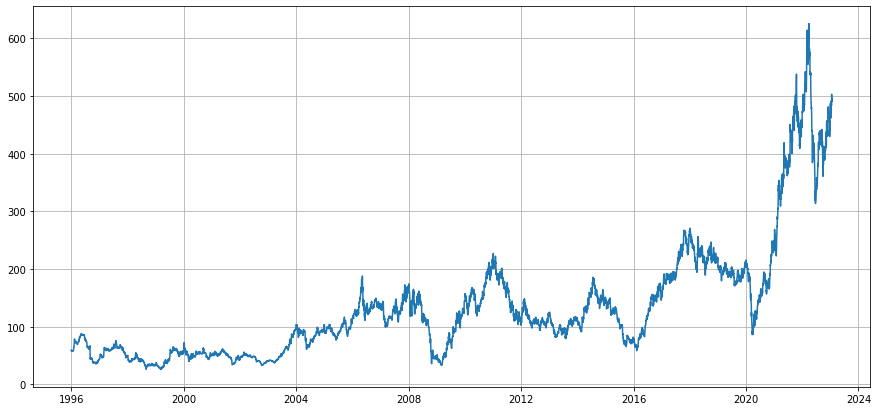

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Close'])

plt.grid(True)
plt.show()

In [ ]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(data['Close'], 24) # prediction for next hour, using the last observed day's data.  (past 24 hours)

474.6875

In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

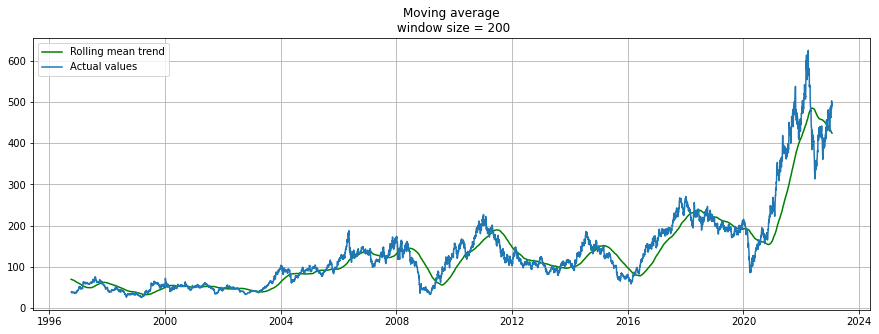

In [ ]:
plotMovingAverage(data['Close'], 200) 

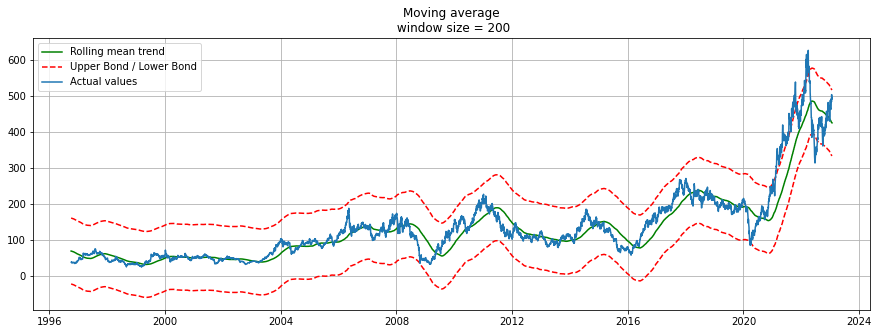

In [ ]:
plotMovingAverage(data['Close'], 200, plot_intervals=True)

In [ ]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [ ]:
weighted_average(data['Close'], [0.6, 0.3, 0.1])

493.39501037597654

In [ ]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                   # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [ ]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

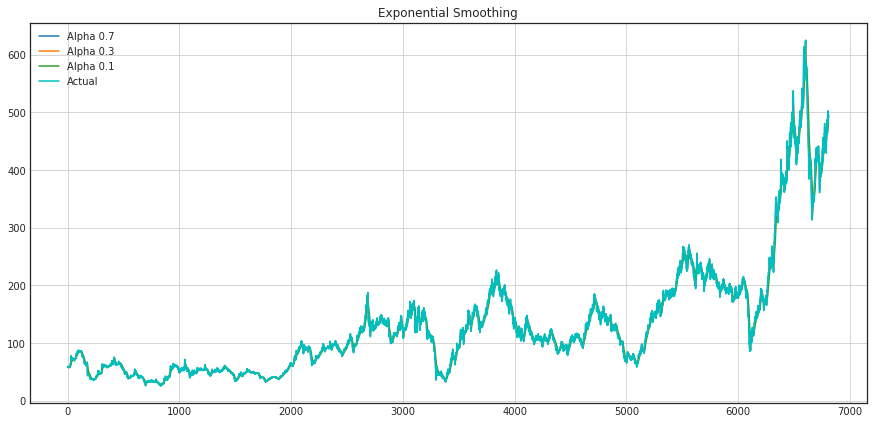

In [ ]:
plotExponentialSmoothing(data['Close'], [0.7,0.3, 0.1])

In [ ]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

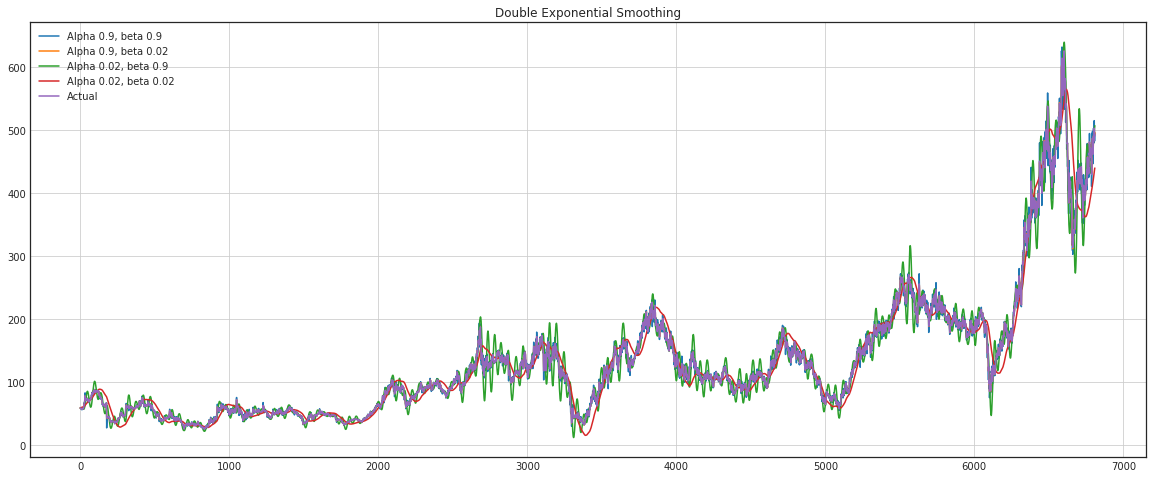

In [ ]:
plotDoubleExponentialSmoothing(data['Close'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [ ]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

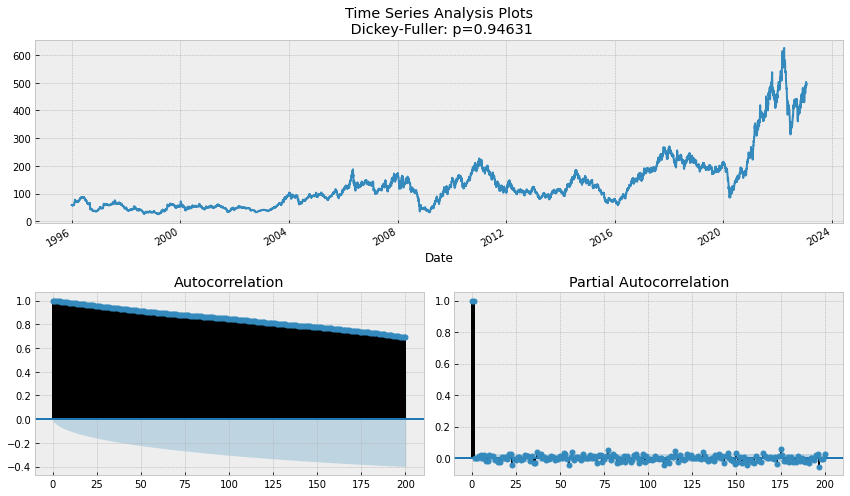

In [ ]:
tsplot(data['Close'], lags=200)

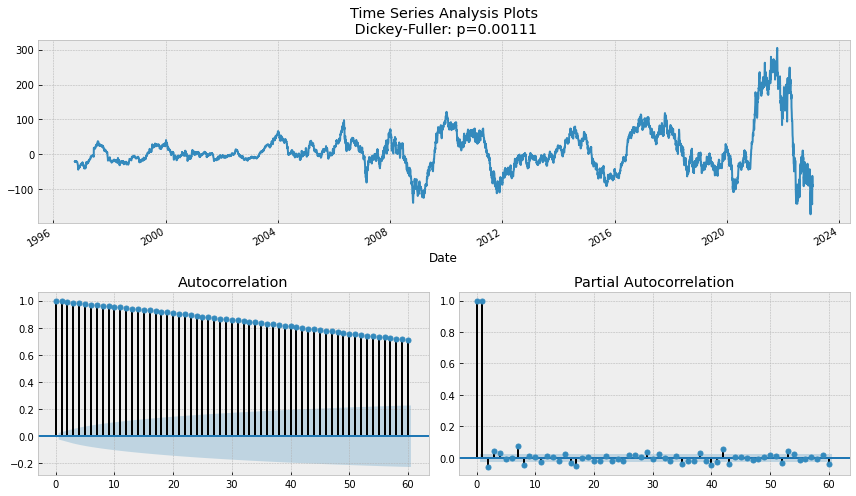

In [ ]:
cls_diff = data['Close'] - data['Close'].shift(200)
tsplot(cls_diff[200:], lags=60)

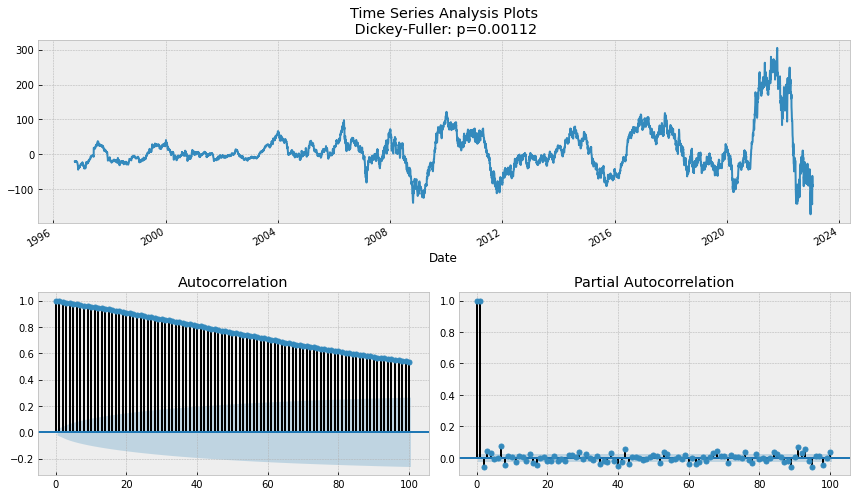

In [ ]:
cls_diff = data['Close'] - data['Close'].shift(200)
tsplot(cls_diff[200+1:], lags=100)

#Implementing Facebook Prophet Model

In [ ]:
import pandas as pd
from prophet import Prophet


In [ ]:
data = yf.Ticker('HINDALCO.NS')

In [ ]:
data = data.history(period='max')

In [ ]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-17 00:00:00+05:30,481.750000,489.299988,476.950012,487.899994,7819426,0.0,0.0
2023-01-18 00:00:00+05:30,488.500000,504.000000,488.500000,502.950012,12045667,0.0,0.0
2023-01-19 00:00:00+05:30,493.149994,503.000000,491.000000,498.899994,7945795,0.0,0.0
2023-01-20 00:00:00+05:30,498.000000,501.549988,488.250000,489.950012,5664588,0.0,0.0
2023-01-23 00:00:00+05:30,494.000000,500.350006,491.200012,494.200012,5557813,0.0,0.0


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.rename(columns = {'Date':'ds','Close':'y'},inplace = True)

In [ ]:
data = data[['ds','y']]

In [ ]:
data = data.iloc[:-1]

In [ ]:
def remove_timezone(dt):
   
    # HERE `dt` is a python datetime
    # object that used .replace() method
    return dt.replace(tzinfo=None)
data['ds'] = data['ds'].apply(lambda x:remove_timezone(x))

In [ ]:
# Python
m = Prophet()
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1fwpu0q/m158to1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1fwpu0q/9pd7rbqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66297', 'data', 'file=/tmp/tmpp1fwpu0q/m158to1w.json', 'init=/tmp/tmpp1fwpu0q/9pd7rbqc.json', 'output', 'file=/tmp/tmpp1fwpu0q/prophet_modelpi8f0x95/prophet_model-20230123181333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:13:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:13:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=5)
future.tail()

,ds
6808,2023-01-21
6809,2023-01-22
6810,2023-01-23
6811,2023-01-24
6812,2023-01-25


In [ ]:
forecast = m.predict(future)
forecast['avg'] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].mean(axis=1)


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper','avg']].tail()

,ds,yhat,yhat_lower,yhat_upper,avg
6808,2023-01-21,317.293831,263.570544,372.692740,317.852371
6809,2023-01-22,341.081868,290.287221,396.949740,342.772943
6810,2023-01-23,423.664725,372.587655,477.450533,424.567638
6811,2023-01-24,423.302960,369.094087,475.361497,422.586181
6812,2023-01-25,423.248970,372.914457,478.867714,425.010380


In [ ]:
forecast[forecast['ds']=='2023-01-23']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
163,2023-01-23,499.202152,461.379343,516.277408,499.162336,499.239211,-10.936449,-10.936449,-10.936449,-10.936449,-10.936449,-10.936449,0.0,0.0,0.0,488.265703


#Applying Machine Learning Model Using Sklearn 

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import yfinance as yf

In [32]:
hindalco_df = yf.Ticker('^NSEI')

In [33]:
hindalco_df = hindalco_df.history(period='max')

In [34]:
hindalco_df.shape

(3768, 7)

In [35]:
hindalco_df.drop(columns=['Dividends','Stock Splits'],inplace=True)

In [36]:
hindalco_df.reset_index(inplace=True)

#Feature Engineering

In [37]:
hindalco_df.tail()

,Date,Open,High,Low,Close,Volume
3763,2023-01-24 00:00:00+05:30,18183.949219,18201.250000,18078.650391,18118.300781,216900
3764,2023-01-25 00:00:00+05:30,18093.349609,18100.599609,17846.150391,17891.949219,257200
3765,2023-01-27 00:00:00+05:30,17877.199219,17884.750000,17493.550781,17604.349609,476300
3766,2023-01-30 00:00:00+05:30,17541.949219,17709.150391,17405.550781,17648.949219,432400
3767,2023-02-01 00:00:00+05:30,17811.599609,17972.199219,17353.400391,17616.300781,0


In [38]:
hindalco_df.iloc[-1:,2:]=0

In [39]:
hindalco_df.iloc[-1:,:]

,Date,Open,High,Low,Close,Volume
3767,2023-02-01 00:00:00+05:30,17811.599609,0.0,0.0,0.0,0


In [40]:
hindalco_df['month'] = pd.to_datetime(hindalco_df['Date']).dt.month
hindalco_df['year'] = pd.to_datetime(hindalco_df['Date']).dt.year
hindalco_df['day'] = pd.to_datetime(hindalco_df['Date']).dt.day

In [41]:
for i in range(14,200,14):
  if i!=0:
    hindalco_df[f'Ma_{i}'] = hindalco_df['Close'].rolling(i).mean() 
    hindalco_df[f'std_{i}'] = hindalco_df['Close'].rolling(i).std()
    

In [42]:
for i in range(14,200,14):
  if i!=0:
    hindalco_df[f'high_Ma_{i}'] = hindalco_df['High'].rolling(i).mean() 
    hindalco_df[f'low_Ma_{i}'] = hindalco_df['Low'].rolling(i).mean() 
    hindalco_df[f'vol_Ma_{i}'] = hindalco_df['Volume'].rolling(i).mean() 

In [43]:
hindalco_df.tail()

,Date,Open,High,Low,Close,Volume,month,year,day,Ma_14,...,vol_Ma_154,high_Ma_168,low_Ma_168,vol_Ma_168,high_Ma_182,low_Ma_182,vol_Ma_182,high_Ma_196,low_Ma_196,vol_Ma_196
3763,2023-01-24 00:00:00+05:30,18183.949219,18201.250000,18078.650391,18118.300781,216900,1,2023,24,18004.521345,...,258407.792208,17479.514637,17299.337484,259367.857143,17385.306909,17199.671408,261379.120879,17374.895956,17185.013986,263944.897959
3764,2023-01-25 00:00:00+05:30,18093.349609,18100.599609,17846.150391,17891.949219,257200,1,2023,25,17997.364118,...,258889.610390,17490.801240,17310.899687,259027.976190,17394.188230,17207.942013,261141.208791,17377.125289,17186.997404,264006.632653
3765,2023-01-27 00:00:00+05:30,17877.199219,17884.750000,17493.550781,17604.349609,476300,1,2023,27,17979.142718,...,260263.636364,17499.814040,17318.468738,260231.547619,17402.325871,17215.367568,262173.626374,17380.426309,17189.169349,264517.857143
3766,2023-01-30 00:00:00+05:30,17541.949219,17709.150391,17405.550781,17648.949219,432400,1,2023,30,17946.839146,...,260846.753247,17505.847674,17323.822312,261308.928571,17409.494001,17222.006310,262993.956044,17382.638044,17192.132877,264676.020408
3767,2023-02-01 00:00:00+05:30,17811.599609,0.000000,0.000000,0.000000,0,2,2023,1,16667.256975,...,259158.441558,17406.497971,17225.477667,257430.357143,17319.830540,17134.134884,261431.868132,17294.949777,17105.505585,263216.326531


In [44]:
hindalco_df.dropna(inplace=True)

In [45]:
hindalco_df.shape

(3573, 79)

In [46]:
hindalco_df.tail()

,Date,Open,High,Low,Close,Volume,month,year,day,Ma_14,...,vol_Ma_154,high_Ma_168,low_Ma_168,vol_Ma_168,high_Ma_182,low_Ma_182,vol_Ma_182,high_Ma_196,low_Ma_196,vol_Ma_196
3763,2023-01-24 00:00:00+05:30,18183.949219,18201.250000,18078.650391,18118.300781,216900,1,2023,24,18004.521345,...,258407.792208,17479.514637,17299.337484,259367.857143,17385.306909,17199.671408,261379.120879,17374.895956,17185.013986,263944.897959
3764,2023-01-25 00:00:00+05:30,18093.349609,18100.599609,17846.150391,17891.949219,257200,1,2023,25,17997.364118,...,258889.610390,17490.801240,17310.899687,259027.976190,17394.188230,17207.942013,261141.208791,17377.125289,17186.997404,264006.632653
3765,2023-01-27 00:00:00+05:30,17877.199219,17884.750000,17493.550781,17604.349609,476300,1,2023,27,17979.142718,...,260263.636364,17499.814040,17318.468738,260231.547619,17402.325871,17215.367568,262173.626374,17380.426309,17189.169349,264517.857143
3766,2023-01-30 00:00:00+05:30,17541.949219,17709.150391,17405.550781,17648.949219,432400,1,2023,30,17946.839146,...,260846.753247,17505.847674,17323.822312,261308.928571,17409.494001,17222.006310,262993.956044,17382.638044,17192.132877,264676.020408
3767,2023-02-01 00:00:00+05:30,17811.599609,0.000000,0.000000,0.000000,0,2,2023,1,16667.256975,...,259158.441558,17406.497971,17225.477667,257430.357143,17319.830540,17134.134884,261431.868132,17294.949777,17105.505585,263216.326531


In [47]:
#Splitiing the data
train_x = hindalco_df.iloc[0:-300]
x_train = train_x.drop(columns=['Date','High','Low','Close','Volume'])
y_train = hindalco_df.iloc[:-300]['Close']

test_x = hindalco_df.iloc[-300:-1]
x_test = test_x.drop(columns=['Date','High','Low','Close','Volume'])
y_test = hindalco_df.iloc[-300:-1]['Close']

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
#importing the 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic = ElasticNet()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100],'l1_ratio':[0.3,0.5,0.8]}
model = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error')
model.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100],
                         'l1_ratio': [0.3, 0.5, 0.8]},
             scoring='neg_mean_squared_error')

In [50]:
#from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor(n_estimators=400,min_samples_split=40,min_samples_leaf=20,random_state=1)
#model.fit(x_train,y_train)

In [51]:
y_pred_train_r = model.predict(x_train)
y_pred_test_r = model.predict(x_test)

In [52]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",model.score(x_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: -6400.287441244443
MSE : 6400.287441244443
RMSE : 80.00179648760671
MAE : 55.9908269181537
R2 : 0.9994002840896035
Adjusted R2 : 0.9992021636549189


In [53]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 20804.091093516377
RMSE : 144.236233636061
MAE : 115.71727878745051
R2 : 0.9663618348091243
Adjusted R2 : 0.95524922666571


In [54]:
pred_df = hindalco_df.tail(1).drop(columns=['Date','High','Low','Close','Volume'])

In [55]:
pred_df

,Open,month,year,day,Ma_14,std_14,Ma_28,std_28,Ma_42,std_42,...,vol_Ma_154,high_Ma_168,low_Ma_168,vol_Ma_168,high_Ma_182,low_Ma_182,vol_Ma_182,high_Ma_196,low_Ma_196,vol_Ma_196
3767,17811.599609,2,2023,1,16667.256975,4800.153431,17363.619559,3406.598915,17746.235677,2819.578601,...,259158.441558,17406.497971,17225.477667,257430.357143,17319.83054,17134.134884,261431.868132,17294.949777,17105.505585,263216.326531


In [56]:
model.predict(pred_df)

array([17689.51066403])